# COVID-19 world

https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

https://github.com/CSSEGISandData/COVID-19

In [1]:
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages')
sys.path

['/Users/andreazen/Dropbox/GitHub/COVID-19_plots',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/andreazen/Library/Python/3.7/lib/python/site-packages',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/Users/andreazen/.ipython']

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

In [3]:
#csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
dati = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
datid = pd.read_csv(url)

In [4]:
dati.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,4,4,5,5,6
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,9
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [5]:
dati.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20'],
      dtype='object')

In [6]:
#dati.describe()
dati.index

RangeIndex(start=0, stop=256, step=1)

In [7]:
a = dati[ dati['Country/Region'] == 'US' ]
len( list( a['Province/State'] ) )
#print(a)
#type(a
a.sum()

Province/State          0
Country/Region         US
Lat               37.0902
Long             -95.7129
1/22/20                 1
                   ...   
3/28/20            121478
3/29/20            140886
3/30/20            161807
3/31/20            188172
4/1/20             213372
Length: 75, dtype: object

In [8]:
b = dati[ dati['Province/State'] == 'Hubei' ].T['1/22/20':].index
dati.T['1/22/20':].index
y = dati[ dati['Province/State'] == 'Hubei' ].T['1/22/20':].T.stack().to_numpy()
xticks = dati.T['1/22/20':].index
x = np.arange( len(xticks) )
x, y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 array([444, 444, 549, 761, 1058, 1423, 3554, 3554, 4903, 5806, 7153,
        11177, 13522, 16678, 19665, 22112, 24953, 27100, 29631, 31728,
        33366, 33366, 48206, 54406, 56249, 58182, 59989, 61682, 62031,
        62442, 62662, 64084, 64084, 64287, 64786, 65187, 65596, 65914,
        66337, 66907, 67103, 67217, 67332, 67466, 67592, 67666, 67707,
        67743, 67760, 67773, 67781, 67786, 67790, 67794, 67798, 67799,
        67800, 67800, 67800, 67800, 67800, 67800, 67801, 67801, 67801,
        67801, 67801, 67801, 67801, 67801, 67802], dtype=object))

In [9]:
datetime.strptime("1/22/20", '%m/%d/%y').strftime('%m %d')
#datetime.strptime(, '%m/%d/%y').strftime('%m %d')
xticks
for date in list(xticks):
    print(datetime.strptime(date, '%m/%d/%y').strftime('%b %d'))

Jan 22
Jan 23
Jan 24
Jan 25
Jan 26
Jan 27
Jan 28
Jan 29
Jan 30
Jan 31
Feb 01
Feb 02
Feb 03
Feb 04
Feb 05
Feb 06
Feb 07
Feb 08
Feb 09
Feb 10
Feb 11
Feb 12
Feb 13
Feb 14
Feb 15
Feb 16
Feb 17
Feb 18
Feb 19
Feb 20
Feb 21
Feb 22
Feb 23
Feb 24
Feb 25
Feb 26
Feb 27
Feb 28
Feb 29
Mar 01
Mar 02
Mar 03
Mar 04
Mar 05
Mar 06
Mar 07
Mar 08
Mar 09
Mar 10
Mar 11
Mar 12
Mar 13
Mar 14
Mar 15
Mar 16
Mar 17
Mar 18
Mar 19
Mar 20
Mar 21
Mar 22
Mar 23
Mar 24
Mar 25
Mar 26
Mar 27
Mar 28
Mar 29
Mar 30
Mar 31
Apr 01


China 82361
Italy 110574
US 213372
Spain 104118
Germany 77872
Iran 47593
France 57749
Switzerland 17768
Korea, South 9887
United Kingdom 29865
Netherlands 13696
Austria 10711
Belgium 13964
Norway 4863
Canada 9560
Japan 2178
Singapore 1000
Brazil 6836
Australia 4862
India 1998


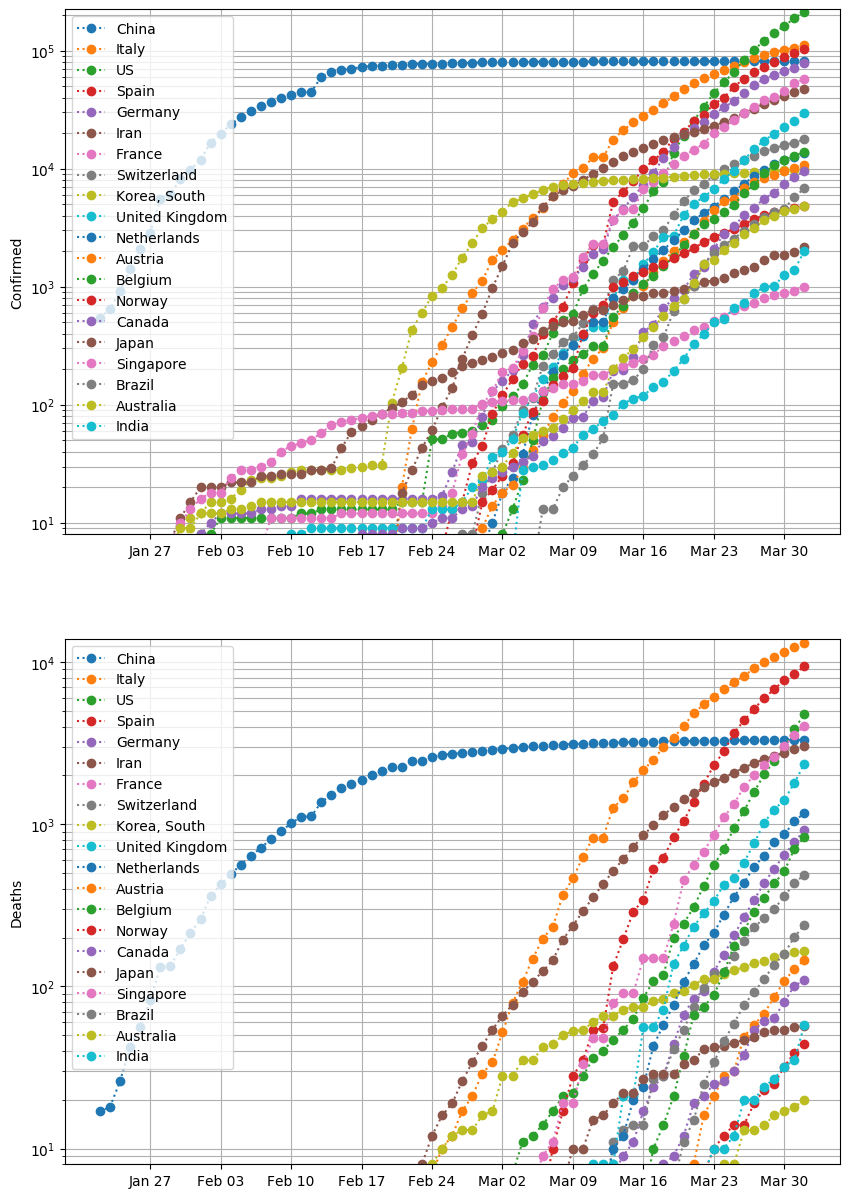

In [10]:
%matplotlib inline 
##%matplotlib 
#plt.rcParams['figure.figsize'] = [10, 8]

plt.close('all')
mpl.style.use('default') #'seaborn-white', ggplot
fig, ax = plt.subplots(2,1, figsize=(10,15))

xticks = dati.T['1/22/20':].index
fxticks = [ datetime.strptime(date, '%m/%d/%y').strftime('%b %d') for date in list(xticks) ]
x = np.arange( len(xticks) )
    
#lista = ['Italy', 'France', 'Germany', 'Spain', 'United Kingdom']
lista = []
lista.append('China') 
lista.append('Italy')
lista.append('US') 
lista.append('Spain') 
lista.append('Germany') 
lista.append('Iran') 
lista.append('France') 
lista.append('Switzerland') 
lista.append('Korea, South') 
lista.append('United Kingdom') 
lista.append('Netherlands') 
lista.append('Austria') 
lista.append('Belgium') 
lista.append('Norway') 
lista.append('Canada') 

lista.append('Japan') 
lista.append('Singapore') 
lista.append('Brazil') 
lista.append('Australia') 
lista.append('India') 

for name in lista:
#    print(name)
    y  = dati[ dati['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
    yd = datid[ datid['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
#    print(y)
    print(name,y[-1])
    ax[0].plot(x, y, 
             marker = 'o',
             linestyle = ':',
             label = name )
    ax[1].plot(x, yd, 
             marker = 'o',
             linestyle = ':',
             label = name )
    ax[0].set_ylabel('Confirmed')
    ax[1].set_ylabel('Deaths')

lista = []
#lista = ['Hubei', 'Beijing', 'New York']
for name in lista:
    print(name)
    y = dati[ dati['Province/State'] == name ].T['1/22/20':].T.stack().to_numpy()
    ax[0].plot(x, y, 
               marker = '.', 
               linestyle ='-.', 
               label = name)
    ax[1].plot(x, yd, 
               marker = '.', 
               linestyle ='-.', 
               label = name)
    
start = 5; step = 7
for i in range(2):
    #ax[i].set_xlim( 0, xt.max()+1)
    ax[i].set_xticks(x[start::step])
    ax[i].set_xticklabels(fxticks[start::step])
    #ax[i].set_xticklabels([])
    #ax[i].set_xticks(xticks, minor=True)
    ax[i].grid(True, 'both')
    ax[i].legend(loc='best')
    ax[i].set_ylim(bottom=8)
    ax[i].set_yscale('log')


#plt.axhline(y=50000,color='b', linestyle='-.')

#plt.savefig('plot_world.pdf')
plt.savefig('plot_world.png')

delay =  7
China 82361 3316
Italy 110574 13155
US 213372 4757
Spain 104118 9387
Germany 77872 920
Iran 47593 3036
France 57749 4043
Switzerland 17768 488
Korea, South 9887 165
United Kingdom 29865 2357
Netherlands 13696 1175
Austria 10711 146
Belgium 13964 828
Norway 4863 44
Canada 9560 109
Japan 2178 57
Singapore 1000 3
Brazil 6836 240
Australia 4862 20
India 1998 58


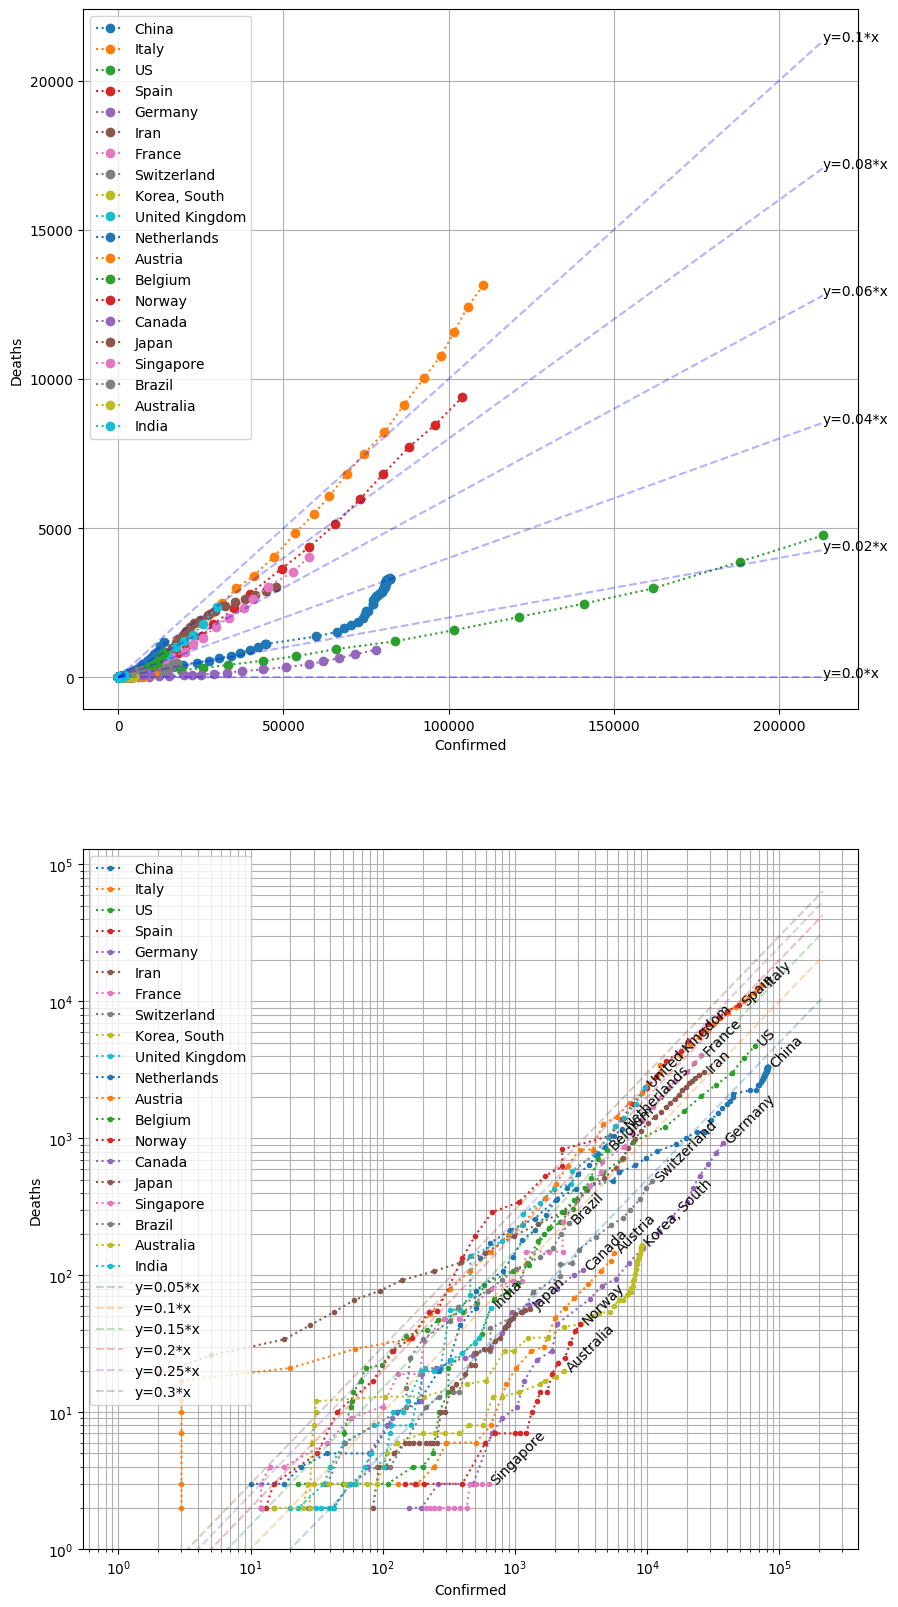

In [11]:
%matplotlib inline 
##%matplotlib 
#plt.rcParams['figure.figsize'] = [10, 8]

plt.close('all')
mpl.style.use('default') #'seaborn-white', ggplot
fig, ax = plt.subplots(2,1, figsize=(10,20))

xticks = dati.T['1/22/20':].index
fxticks = [ datetime.strptime(date, '%m/%d/%y').strftime('%b %d') for date in list(xticks) ]
x = np.arange( len(xticks) )
    
#lista = ['Italy', 'France', 'Germany', 'Spain', 'United Kingdom']
lista = []
lista.append('China') 
lista.append('Italy')
lista.append('US') 
lista.append('Spain') 
lista.append('Germany') 
lista.append('Iran') 
lista.append('France') 
lista.append('Switzerland') 
lista.append('Korea, South') 
lista.append('United Kingdom') 
lista.append('Netherlands') 
lista.append('Austria') 
lista.append('Belgium') 
lista.append('Norway') 
lista.append('Canada') 

lista.append('Japan') 
lista.append('Singapore') 
lista.append('Brazil') 
lista.append('Australia') 
lista.append('India') 

xmin = 1; xmax = 10;
delay = 7 # days
print('delay = ',delay)

for name in lista:
#    print(name)
    y  = dati[ dati['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
    yd = datid[ datid['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
#    print(y)
    print(name,y[-1],yd[-1])
    ax[0].plot(y, yd, 
             marker = 'o',
             linestyle = ':',
             label = name )
    ax[0].set_xlabel('Confirmed')
    ax[0].set_ylabel('Deaths')
    xmax = max( xmax, max(y) )
    # same plot with delay
    xn = y[:-delay]
    yn = yd[delay:]
    ii = np.logical_and( xn>1 , yn>1 )
    #print( len(xn[ii]) , len(yn[ii]) )
    ax[1].plot( xn[ii] , yn[ii], 
             marker = '.',
             linestyle = ':',
             label = name )
    ax[1].set_xlabel('Confirmed')
    ax[1].set_ylabel('Deaths')
    ax[1].annotate( name, (xn[-1],yn[-1]), rotation=45 )

xlin = np.linspace( xmin, xmax )
for an in range(6):
    a = 0.02*an
    ax[0].plot( xlin, a*xlin, 'b--', alpha=0.3, label='' )
    ax[0].annotate('y={}*x'.format(a), (xmax,a*xmax) )
    
xlin = np.linspace( 1, xmax )
for an in range(1,7):
    a = 0.05*an
    ax[1].plot( xlin, a*xlin, '--', alpha=0.3, label='y={:3.2}*x'.format(a) )
    #ax[1].annotate('y={:3.2}*x'.format(a), (100, a*100), rotation=45 )
    
start = 5; step = 7
for i in range(2):
    #ax[i].set_xlim( 0, xt.max()+1)
    #ax[i].set_xticks(x[start::step])
    #ax[i].set_xticklabels(fxticks[start::step])
    #ax[i].set_xticklabels([])
    #ax[i].set_xticks(xticks, minor=True)
    ax[i].grid(True, 'both')
    ax[i].legend(loc='best')
    #ax[i].set_xlim(right=1e4)
    #ax[i].set_ylim(top=1e4)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[i].set_ylim(1)

plt.savefig('plot_world_scatter.png')

delay =  7
China 82361 3316
Italy 110574 13155
US 213372 4757
Spain 104118 9387
Germany 77872 920
Iran 47593 3036
France 57749 4043
Switzerland 17768 488
Korea, South 9887 165


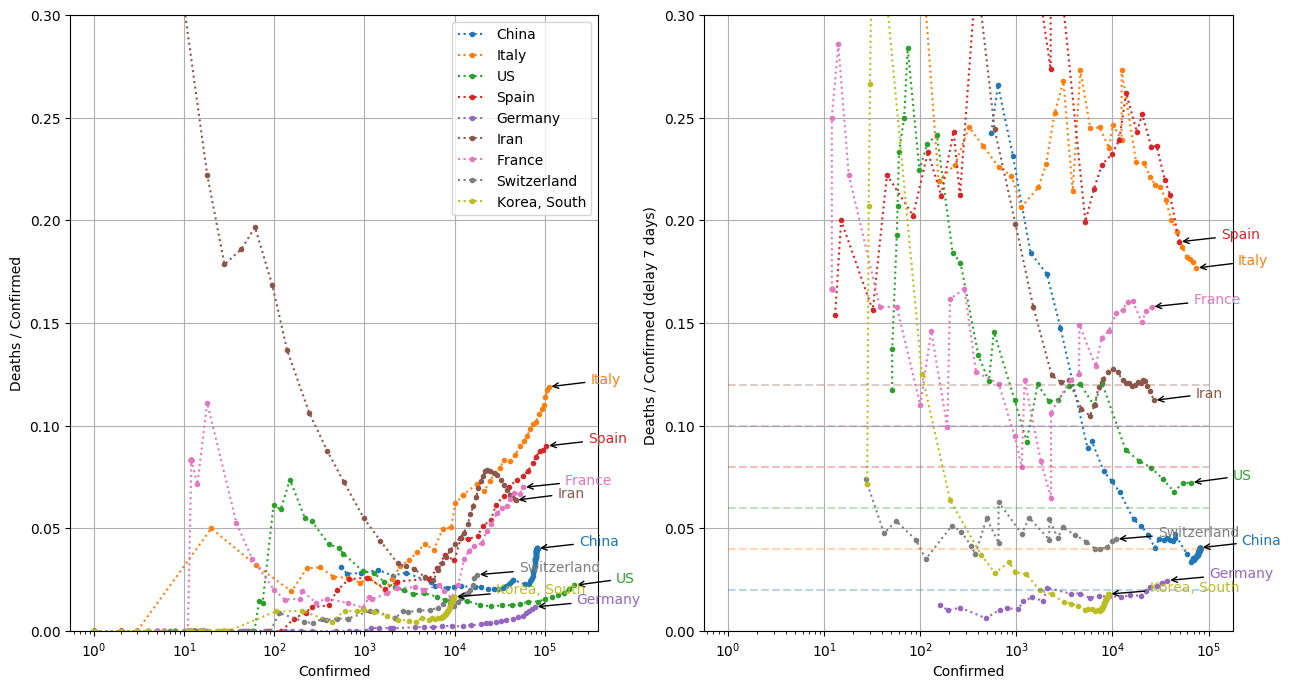

In [19]:
%matplotlib inline 
##%matplotlib 
#plt.rcParams['figure.figsize'] = [10, 8]

plt.close('all')
mpl.style.use('default') #'seaborn-white', ggplot
fig, ax = plt.subplots(1, 2, figsize=(15,8))

xticks = dati.T['1/22/20':].index
fxticks = [ datetime.strptime(date, '%m/%d/%y').strftime('%b %d') for date in list(xticks) ]
x = np.arange( len(xticks) )
    
#lista = ['Italy', 'France', 'Germany', 'Spain', 'United Kingdom']
lista = []
lista.append('China') 
lista.append('Italy')
lista.append('US') 
lista.append('Spain') 
lista.append('Germany') 
lista.append('Iran') 
lista.append('France') 
lista.append('Switzerland') 
lista.append('Korea, South') 
#lista.append('United Kingdom') 
#lista.append('Netherlands') 
#lista.append('Austria') 
#lista.append('Belgium') 
#lista.append('Norway') 
#lista.append('Canada') 

#lista.append('Japan') 
#lista.append('Singapore') 
#lista.append('Brazil') 
#lista.append('Australia') 
#lista.append('India') 

xmin = 1; xmax = 10;

delay = 7 # days
print('delay = ',delay)

for n, name in enumerate(lista):
    cn='C{}'.format(n)

#    print(name)
    y  = dati[ dati['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
    yd = datid[ datid['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
#    print(y)
    print(name,y[-1],yd[-1])
    yp = y>0
#    print( yp )
#    print( yd[yp] )
#    print( y[yp] )
    ax[0].plot(y[yp], yd[yp]/y[yp], label = name, 
             marker = '.', linestyle = ':', color = cn )
    ax[0].set_xlabel('Confirmed')
    ax[0].set_ylabel('Deaths / Confirmed')
    ax[0].annotate( name, xy=(y[-1],yd[-1]/y[-1]), xycoords='data',
                       xytext=(30, 10), textcoords='offset points',
                       arrowprops=dict(facecolor='black',arrowstyle="->"),
                       horizontalalignment='left', verticalalignment='top', color=cn)
    
    # same plot with delay
    xn = y[:-delay]
    yn = yd[delay:]
    ii = np.logical_and( xn>1 , yn>1 )
    #print( len(xn[ii]) , len(yn[ii]) )
    ax[1].plot( xn[ii] , yn[ii] / xn[ii], label = name, 
             marker = '.', linestyle = ':', color = cn )
    ax[1].set_xlabel('Confirmed')
    ax[1].set_ylabel('Deaths / Confirmed (delay {} days) '.format(delay) )
    ax[1].annotate( name, xy=(xn[-1],yn[-1]/xn[-1]), xycoords='data',
                       xytext=(30, 10), textcoords='offset points',
                       arrowprops=dict(facecolor='black',arrowstyle="->"),
                       horizontalalignment='left', verticalalignment='top', color=cn)


#xlin = np.linspace( xmin, xmax )
#for an in range(6):
#    a = 0.02*an
#    ax[0].plot( xlin, a+np.zeros(len(xlin)) , 'b--', alpha=0.3, label='' )
#    ax[0].annotate('y={}*x'.format(a), (xmax,a*xmax) )
    
xlin = np.linspace( 1, 1e5 )
for an in range(1,7):
    a = 0.02*an
    ax[1].plot( xlin, a+np.zeros(len(xlin)), '--', alpha=0.3, label='y={:3.2}*x'.format(a) )
    
#start = 5; step = 7
for i in range(2):
    #ax[i].set_xlim( 0, xt.max()+1)
    #ax[i].set_xticks(x[start::step])
    #ax[i].set_xticklabels(fxticks[start::step])
    #ax[i].set_xticklabels([])
    #ax[i].set_xticks(xticks, minor=True)
    ax[i].grid(True)
    ax[i].set_ylim(0.0,0.3)
    ax[i].set_xscale('log')
    ax[i].set_yscale('linear')
    
ax[0].legend(loc='best')

plt.savefig('plot_world_fatality.png')

China 82361 3316
Italy 110574 13155
US 213372 4757
Spain 104118 9387
Germany 77872 920
Iran 47593 3036
France 57749 4043
Switzerland 17768 488
Korea, South 9887 165
United Kingdom 29865 2357
Netherlands 13696 1175
Austria 10711 146
Belgium 13964 828
Norway 4863 44
Sweden 4947 239
Canada 9560 109
Japan 2178 57
Singapore 1000 3
Brazil 6836 240
Australia 4862 20
India 1998 58


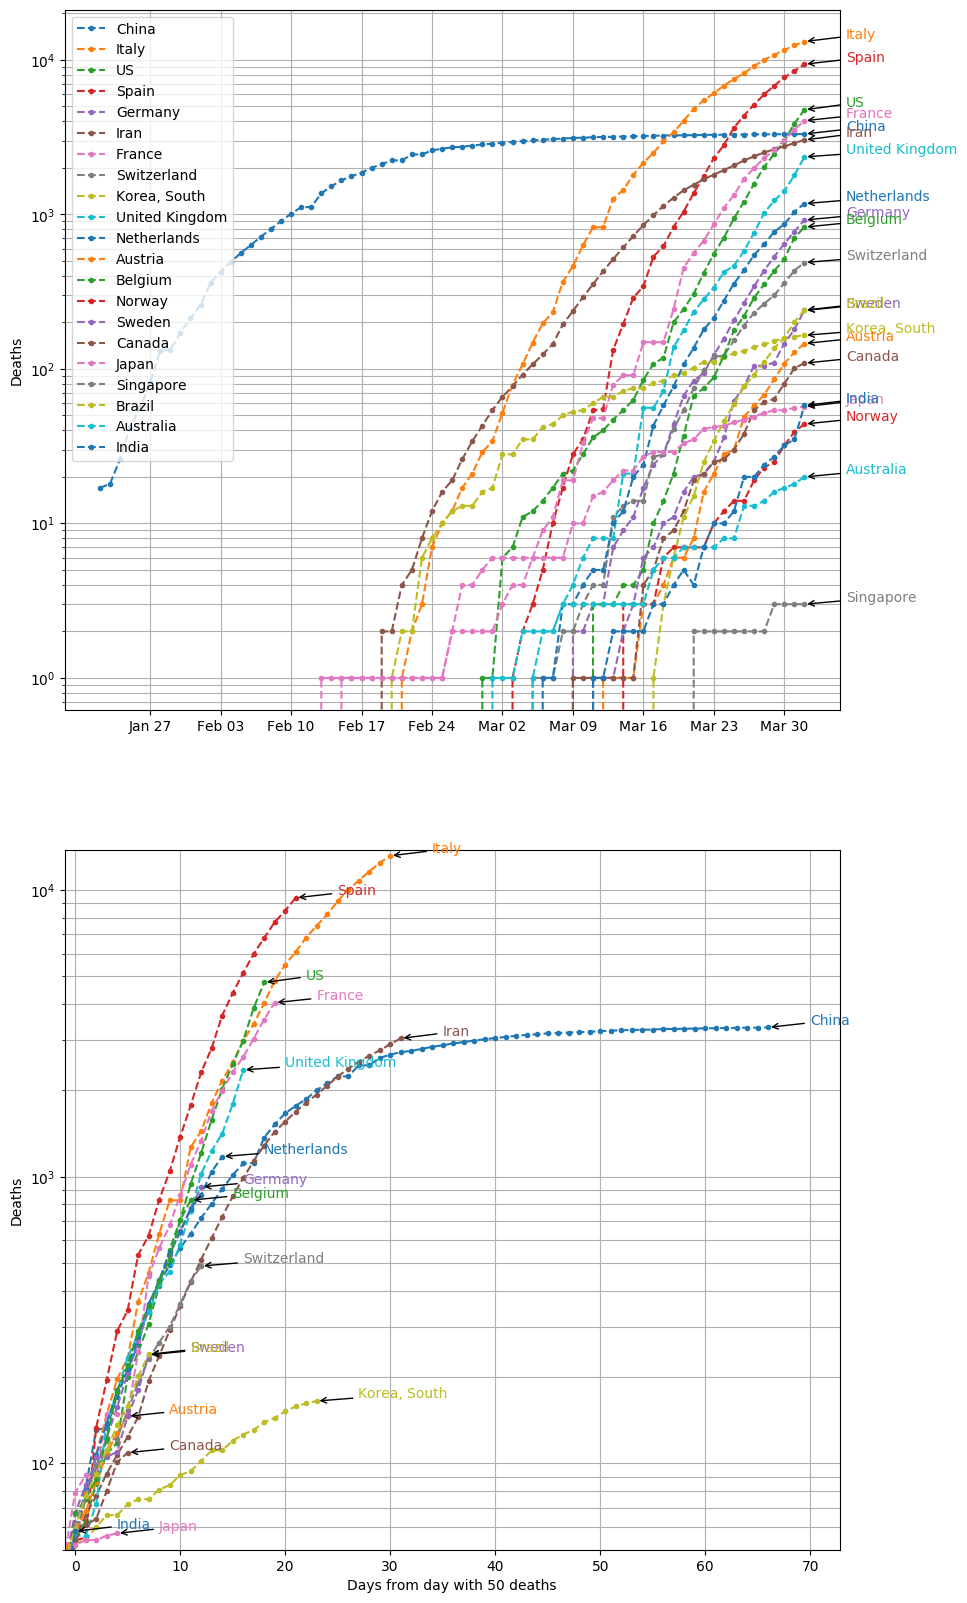

In [20]:
%matplotlib inline 
##%matplotlib 
#plt.rcParams['figure.figsize'] = [10, 8]

plt.close('all')
mpl.style.use('default') # seaborn-white, ggplot, default
fig, ax = plt.subplots( 2,1, figsize=(10,20))

xticks = dati.T['1/22/20':].index
fxticks = [ datetime.strptime(date, '%m/%d/%y').strftime('%b %d') for date in list(xticks) ]
x = np.arange( len(xticks) )
    
#lista = ['Italy', 'France', 'Germany', 'Spain', 'United Kingdom']
lista = []
lista.append('China') 
lista.append('Italy')
lista.append('US') 
lista.append('Spain') 
lista.append('Germany') 
lista.append('Iran') 
lista.append('France') 
lista.append('Switzerland') 
lista.append('Korea, South') 
lista.append('United Kingdom') 
lista.append('Netherlands') 
lista.append('Austria') 
lista.append('Belgium') 
lista.append('Norway') 
lista.append('Sweden')
lista.append('Canada') 

lista.append('Japan') 
lista.append('Singapore') 
lista.append('Brazil') 
lista.append('Australia') 
lista.append('India') 

deaths_xzero = 50

for n, name in enumerate(lista):
    cn='C{}'.format(n)
#    print(name)
    y  = dati[ dati['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
    yd = datid[ datid['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
#    print(y)
    print(name,y[-1],yd[-1])
    ax[0].plot(x, yd, 
             marker = '.', linestyle = '--', color = cn,
             label = name )
    ax[0].annotate(name, 
                       xy=( x[-1], yd[-1] ), xycoords='data',
                       #xytext=(0.8, 0.8-n*0.02), textcoords='axes fraction',
                       xytext=(30, 10), textcoords='offset points',
                       arrowprops=dict(facecolor='black',arrowstyle="->"),
                       horizontalalignment='left', verticalalignment='top', color=cn)

    xmax = max( xmax, max(y) )
    # same plot with delay
    try:
        delay = min( x[yd > deaths_xzero] )
        #delay = max( x[yd < deaths_xzero] )
        xn = x-delay 
        #yn = yd[ xn>0 ]
        #xn = xn[ xn>0 ]
        ax[1].plot( xn , yd, 
             marker = '.', linestyle = '--', color = cn,
             label = name )
        ax[1].annotate(name, 
                       xy=( xn[-1], yd[-1] ), xycoords='data',
                       #xytext=(0.8, 0.8-n*0.02), textcoords='axes fraction',
                       xytext=(30, 10), textcoords='offset points',
                       arrowprops=dict(facecolor='black',arrowstyle="->"),
                       horizontalalignment='left', verticalalignment='top', color=cn)
    except: 
        pass


start = 5; step = 7
#ax[0].set_xlabel('')
ax[0].set_ylabel('Deaths')  
ax[0].set_xticks(x[start::step])
ax[0].set_xticklabels(fxticks[start::step])
ax[0].legend(loc='best')

ax[1].set_xlabel('Days from day with {} deaths'.format(deaths_xzero) )
ax[1].set_ylabel('Deaths')
ax[1].set_xlim( left=-1 )
ax[1].set_ylim( bottom=deaths_xzero )
#ax[1].set_xscale('log')
#ax[1].legend()

for i in range(2):
    #ax[i].set_xticks(x[start::step])
    #ax[i].set_xticklabels(fxticks[start::step])
    #ax[i].set_xticklabels([])
    #ax[i].set_xticks(xticks, minor=True)
    ax[i].grid(True, 'both')
    #ax[i].set_xlim(right=1e4)
    #ax[i].set_xscale('log')
    #ax[i].set_ylim(top=1e4)
    ax[i].set_yscale('log')


plt.savefig('plot_world_deaths.png')

China 82361 3316
Italy 110574 13155
US 213372 4757
Spain 104118 9387
Germany 77872 920
Iran 47593 3036
France 57749 4043
Switzerland 17768 488
Korea, South 9887 165
United Kingdom 29865 2357
Netherlands 13696 1175
Austria 10711 146
Belgium 13964 828
Norway 4863 44
Sweden 4947 239
Canada 9560 109
Japan 2178 57
Singapore 1000 3
Brazil 6836 240
Australia 4862 20
India 1998 58


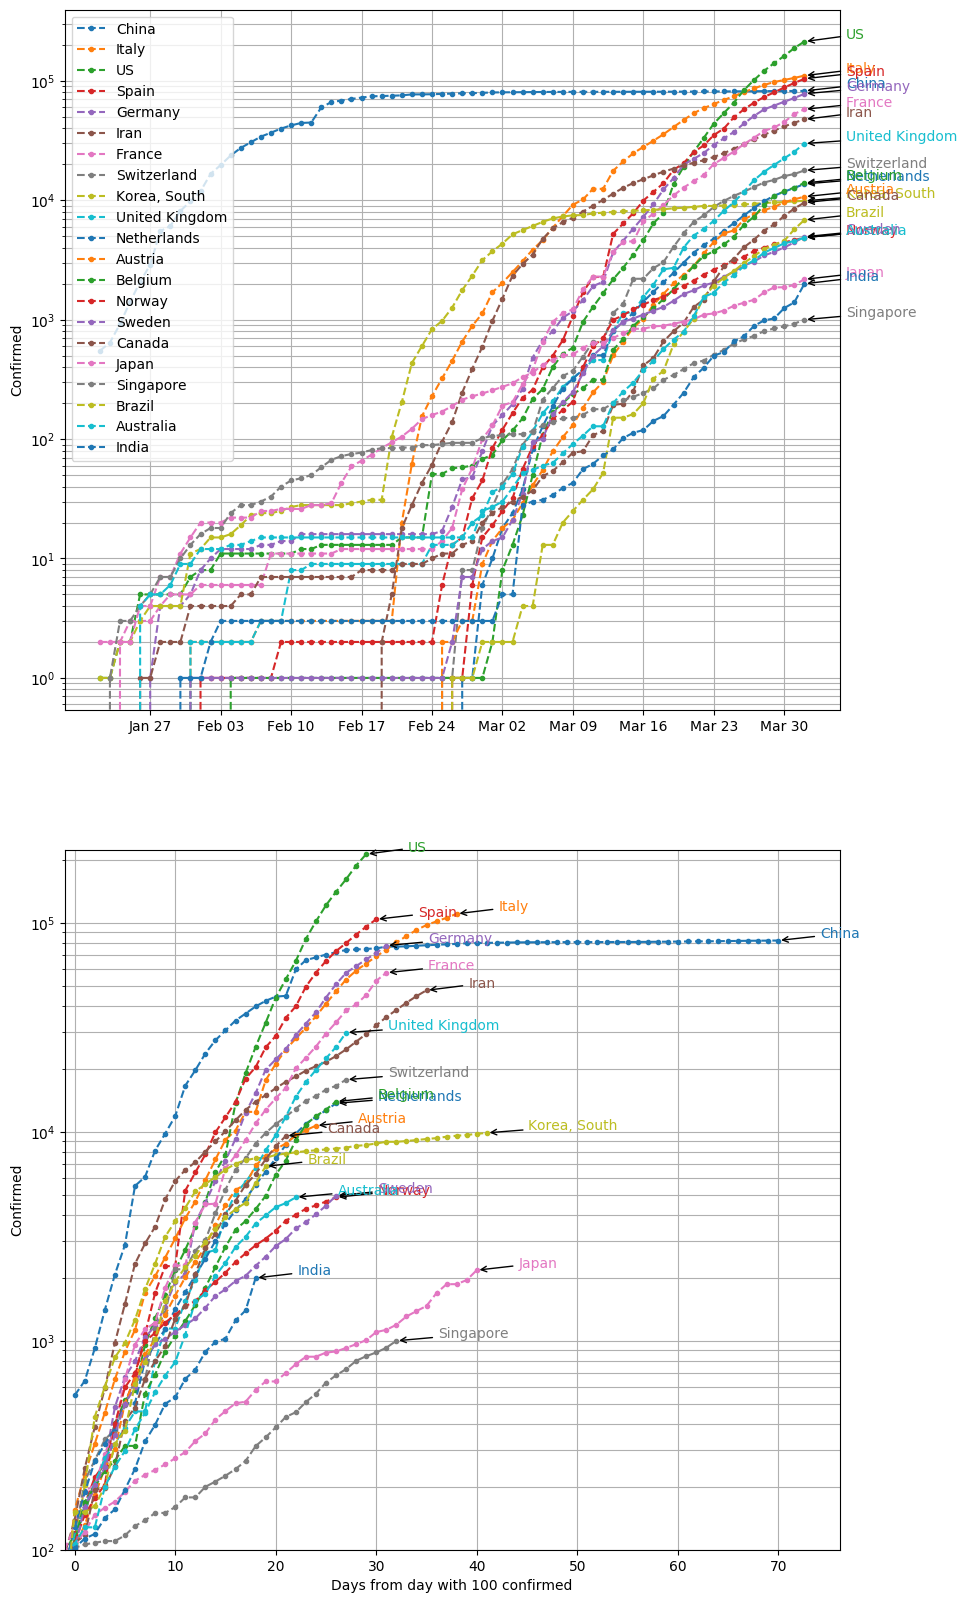

In [14]:
%matplotlib inline 
##%matplotlib 
#plt.rcParams['figure.figsize'] = [10, 8]

plt.close('all')
mpl.style.use('default') # seaborn-white, ggplot, default
fig, ax = plt.subplots( 2,1, figsize=(10,20))

xticks = dati.T['1/22/20':].index
fxticks = [ datetime.strptime(date, '%m/%d/%y').strftime('%b %d') for date in list(xticks) ]
x = np.arange( len(xticks) )
    
#lista = ['Italy', 'France', 'Germany', 'Spain', 'United Kingdom']
lista = []
lista.append('China') 
lista.append('Italy')
lista.append('US') 
lista.append('Spain') 
lista.append('Germany') 
lista.append('Iran') 
lista.append('France') 
lista.append('Switzerland') 
lista.append('Korea, South') 
lista.append('United Kingdom') 
lista.append('Netherlands') 
lista.append('Austria') 
lista.append('Belgium') 
lista.append('Norway') 
lista.append('Sweden')
lista.append('Canada') 

lista.append('Japan') 
lista.append('Singapore') 
lista.append('Brazil') 
lista.append('Australia') 
lista.append('India') 

y_xzero = 100

for n, name in enumerate(lista):
    cn='C{}'.format(n)
#    print(name)
    y  = dati[ dati['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
    yd = datid[ datid['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
#    print(y)
    print(name,y[-1],yd[-1])
    ax[0].plot(x, y, 
             marker = '.', linestyle = '--', color = cn,
             label = name )
    ax[0].annotate(name, 
                       xy=( x[-1], y[-1] ), xycoords='data',
                       #xytext=(0.8, 0.8-n*0.02), textcoords='axes fraction',
                       xytext=(30, 10), textcoords='offset points',
                       arrowprops=dict(facecolor='black',arrowstyle="->"),
                       horizontalalignment='left', verticalalignment='top', color=cn)

    xmax = max( xmax, max(y) )
    # same plot with delay
    try:
        delay = min( x[y > y_xzero] )
        #delay = max( x[y < y_xzero] )
        xn = x-delay
        ax[1].plot( xn , y, 
             marker = '.', linestyle = '--', color = cn,
             label = name )
        ax[1].annotate(name, 
                       xy=( xn[-1], y[-1] ), xycoords='data',
                       #xytext=(0.8, 0.8-n*0.02), textcoords='axes fraction',
                       xytext=(30, 10), textcoords='offset points',
                       arrowprops=dict(facecolor='black',arrowstyle="->"),
                       horizontalalignment='left', verticalalignment='top', color=cn)

    except: 
        pass


start = 5; step = 7
#ax[0].set_xlabel('')
ax[0].set_ylabel('Confirmed')  
ax[0].set_xticks(x[start::step])
ax[0].set_xticklabels(fxticks[start::step])
ax[0].legend(loc='best')

ax[1].set_xlabel('Days from day with {} confirmed'.format(y_xzero) )
ax[1].set_ylabel('Confirmed')
ax[1].set_xlim( left=-1 )
ax[1].set_ylim( bottom=y_xzero )
    
for i in range(2):
    #ax[i].set_xticks(x[start::step])
    #ax[i].set_xticklabels(fxticks[start::step])
    #ax[i].set_xticklabels([])
    #ax[i].set_xticks(xticks, minor=True)
    ax[i].grid(True, 'both')
    #ax[i].set_xlim(right=1e4)
    #ax[i].set_xscale('log')
    #ax[i].set_ylim(top=1e4)
    ax[i].set_yscale('log')


plt.savefig('plot_world_confirmed.png')